In [251]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import math

In [756]:
nvals = []
svals = []
mvals = []

for n in range(500,1960,10):
    filenew = r'C:\Users\Ben\Desktop\REU Python\DataVis\fgf-data\output\{}_s0.0-0.5.csv'.format(n)
    
    colnames=['n', 's','m'] 
    numbers = pd.read_csv(filenew, names=colnames)
    
    for m in range(len(numbers['n'])):
        nvals.append(numbers['n'][m])
        svals.append(numbers['s'][m])
        mvals.append(numbers['m'][m])

nSorted = np.array(nvals, dtype=object)
sSorted = np.array(svals, dtype=object)
mSorted = np.array(mvals, dtype=object)

In [757]:
nFlat = list(nSorted.flatten('C'))
sFlat = list(sSorted.flatten('C'))
mFlat = list(mSorted.flatten('C'))

# 3D Plot

<IPython.core.display.Javascript object>


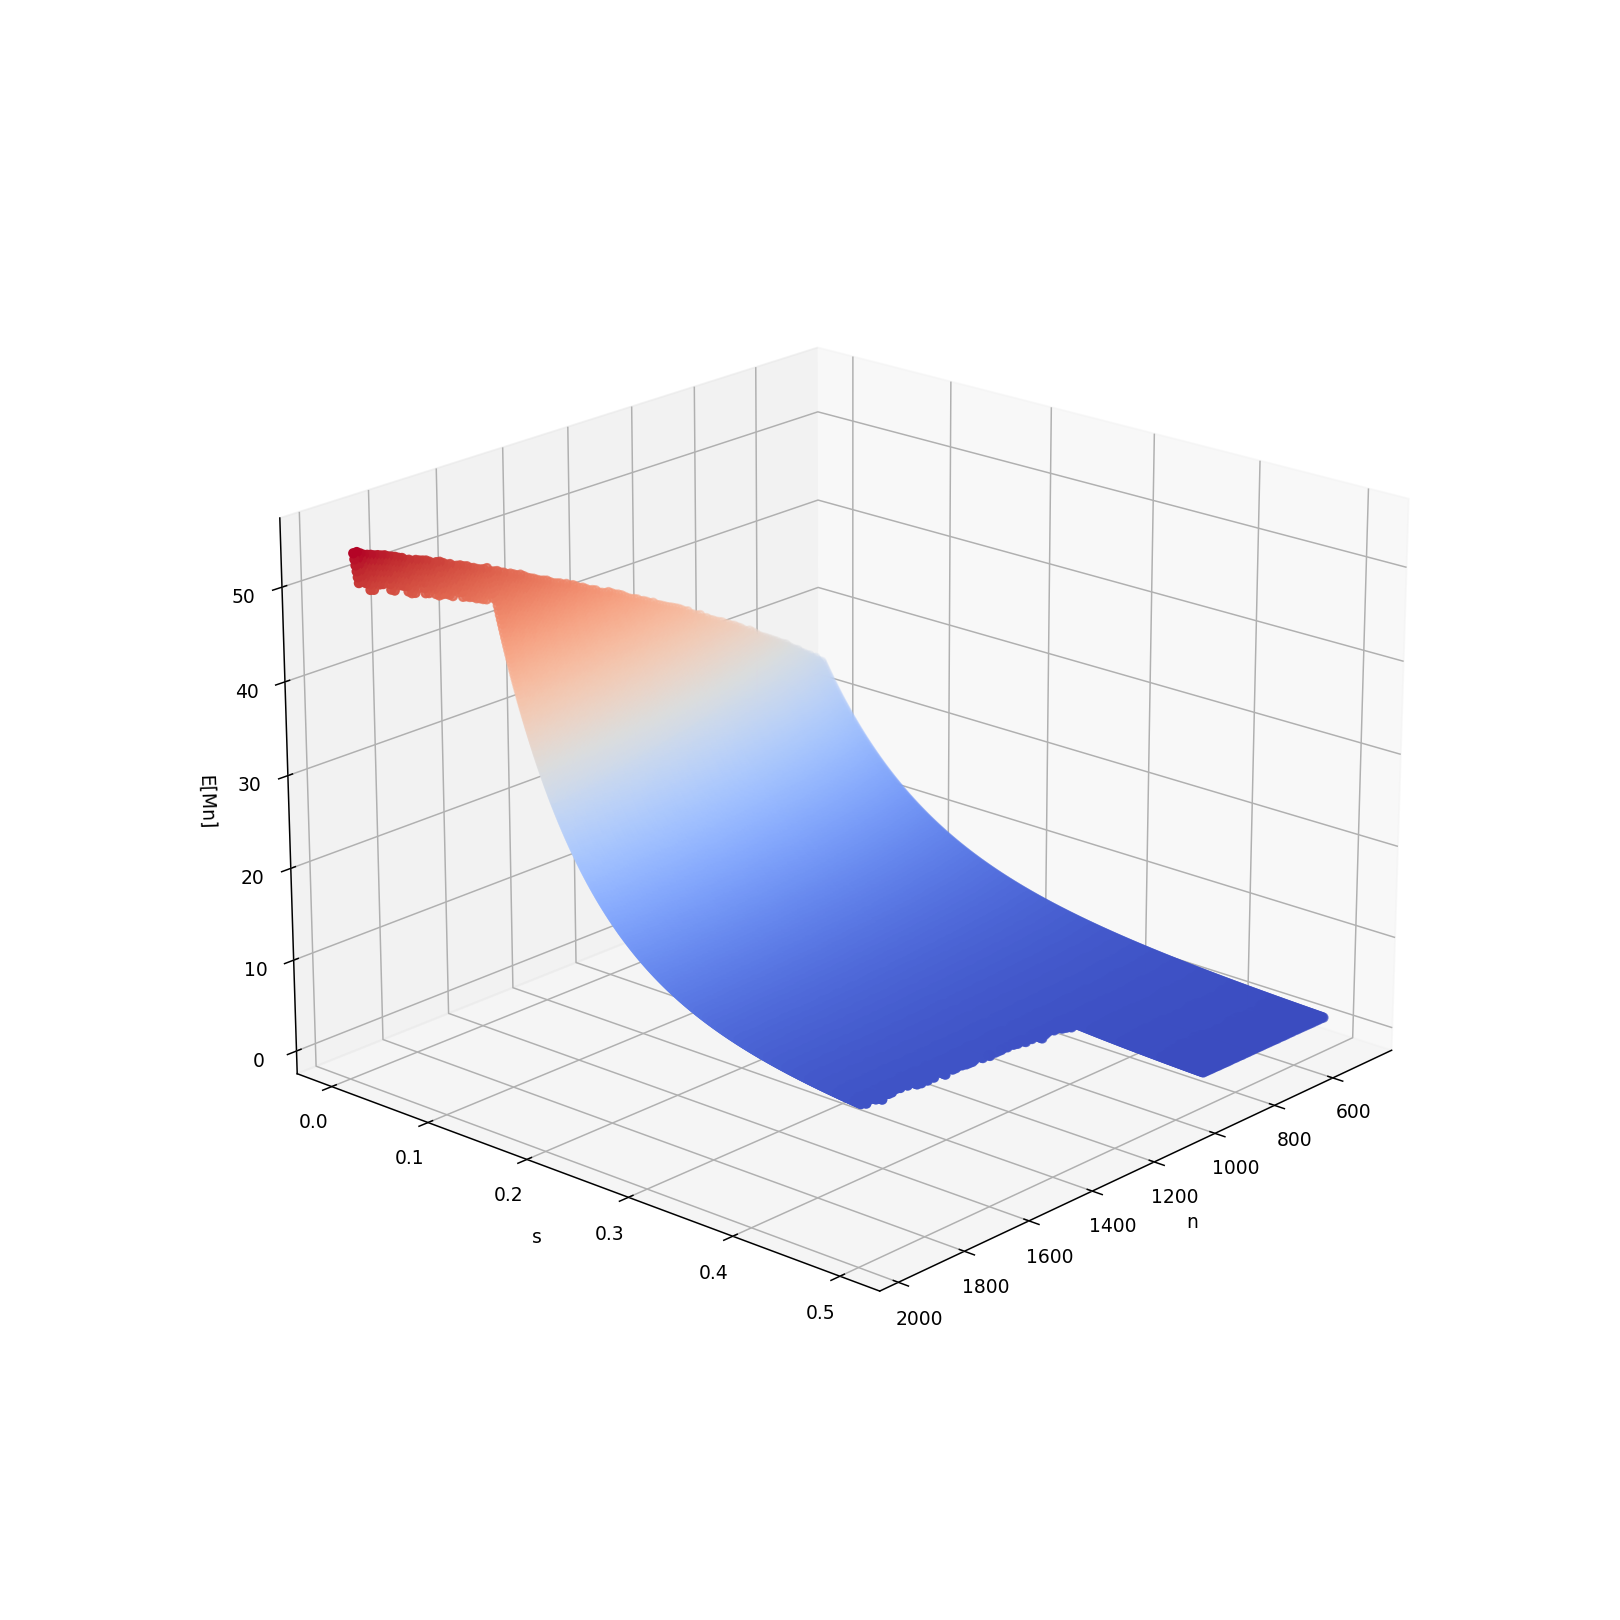

In [760]:
%matplotlib notebook
f = plt.figure(figsize = (12,12))
ax = plt.axes(projection = '3d')

ax.set_xlabel('n')
ax.set_ylabel('s')
ax.set_zlabel('E[Mn]')
ax.scatter3D(nFlat, sFlat, mFlat, cmap='coolwarm', c=mFlat)

## For Fixed S

In [329]:
sStep = .001

In [685]:
S = float(input("Input s Value: "))

Input s Value: 0


In [686]:
# Run cell for fixed s value
nFixeds = []
sFixeds = []
mFixeds = []

for b in range(41):
    nFixeds.append(nSorted[b][int(S*1000)])
    sFixeds.append(sSorted[b][int(S*1000)])
    mFixeds.append(mSorted[b][int(S*1000)])
    
nFixeds = np.array(nFixeds)
sFixeds = np.array(sFixeds)
mFixeds = np.array(mFixeds)

In [687]:
nShorts = [nFixeds[i] for i in range(int(np.floor(len(nFixeds)/2)))]

mShorts = []

for j in range(int(np.floor(len(mFixeds)/2))):
    mShorts.append(mFixeds[j])

In [688]:
def fixs(x, a):
    return a*(np.log(x)**.5)

pops, scov = curve_fit(fixs, nShorts, mShorts, maxfev=500000)
popt, tcov = curve_fit(fixs, nFixeds, mFixeds, maxfev=500000)

[10.51674689]
[11.43509982]


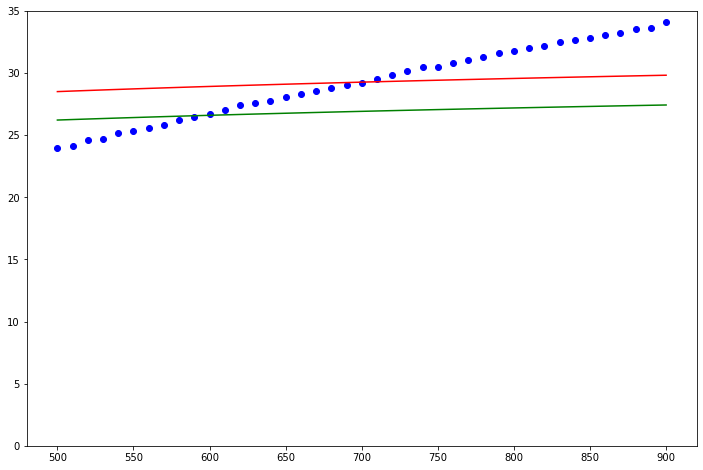

In [689]:
%matplotlib inline
f = plt.figure(figsize = (12,8))
ax1 = plt.subplot(111)


ax1.scatter(nFixeds, mFixeds, c='blue')
ax1.set_ylim(0,int(np.ceil(mFixeds[-1])))
plt.plot(nFixeds, fixs(nFixeds, *pops), c='green')
plt.plot(nFixeds, fixs(nFixeds, *popt), c='red')
plt.show

print(pops)
print(popt)


###### Should give equations for full surface

In [680]:
sVals = list(sSorted[0])
aVals = []
bVals = []

aHalf = []
bHalf = []


for t in range(0,501):
    s = t/1000

    nChanges = []
    sChanges = []
    mChanges = []

    for b in range(41):
        nChanges.append(nSorted[b][int(s*1000)])
        sChanges.append(sSorted[b][int(s*1000)])
        mChanges.append(mSorted[b][int(s*1000)])

    nChanges = np.array(nChanges)
    sChanges = np.array(sChanges)
    mChanges = np.array(mChanges)
    
    nTalls = [nChanges[i] for i in range(int(np.floor(len(nChanges)/2)))]

    mTalls = []
    for j in range(int(np.floor(len(mChanges)/2))):
        mTalls.append(mChanges[j])
        
        
    pops, scov = curve_fit(fixs, nTalls, mTalls, maxfev=500000)
    popt, tcov = curve_fit(fixs, nChanges, mChanges, maxfev=500000)
    
    aVals.append(popt[0])
    #bVals.append(popt[1])
    
    aHalf.append(pops[0])
    #bHalf.append(pops[1])

In [681]:
sVals = np.array(sVals)
aVals = np.array(aVals)
bVals = np.array(bVals)

In [682]:
def fs(x, std, mean, scale):
    y_out = scale/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
    return y_out

popf, fcov = curve_fit(fs, sVals, aVals, maxfev=500000)
print(popf)

[ 3.32823217e+000 -8.98578805e+001  1.75598357e+160]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [683]:
def gs(x, a, b):
    return b*x+a

popg, gcov = curve_fit(gs, sVals, bVals, maxfev = 100000)
print(popg)

ValueError: `ydata` must not be empty!

In [ ]:
def asym(x):
    return -12*x + 3.8

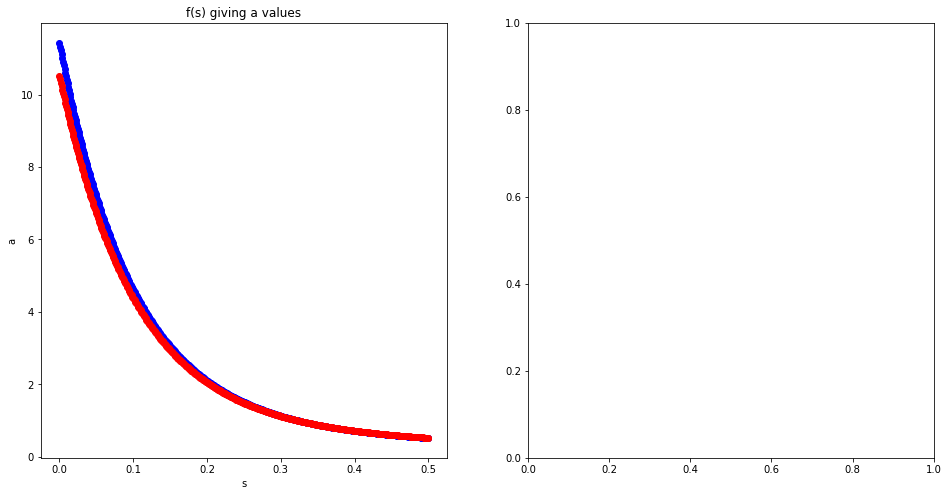

In [690]:
%matplotlib inline
f = plt.figure(figsize = (16,8))
ax1 = plt.subplot(121)
ax2= plt.subplot(122)

ax1.scatter(sVals, aVals, c='blue')
ax1.scatter(sVals, aHalf, c='red')
#ax1.plot(sVals, fs(sVals, *popf), c='red')
ax1.set_xlabel('s')
ax1.set_ylabel('a')
ax1.set_title("f(s) giving a values")

#ax2.scatter(sVals, bVals, c='blue')
#ax2.scatter(sVals, bHalf, c='red')
#ax2.plot(sVals, gs(sVals, *popg), c='red')
#ax2.set_xlim(0,.5)
#ax2.plot(sVals, asym(sVals), c='green')
#ax2.set_xlabel('s')
#ax2.set_ylabel('b')
#ax2.set_title("g(s) giving b values")

plt.show()